In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import random as rd

# How make a decision, if the means of two samples are significantly different?

## Generate a Population of 10,000,000 elements

In [2]:
np.random.seed(None)
pop = list(np.random.normal(100, 20, 10000000))

### Mean and standard deviation from the Population:

In [3]:
pop_mean = np.mean(pop)
pop_sd = np.std(pop)

pop_mean, pop_sd

(100.00817392505063, 20.003504247993277)

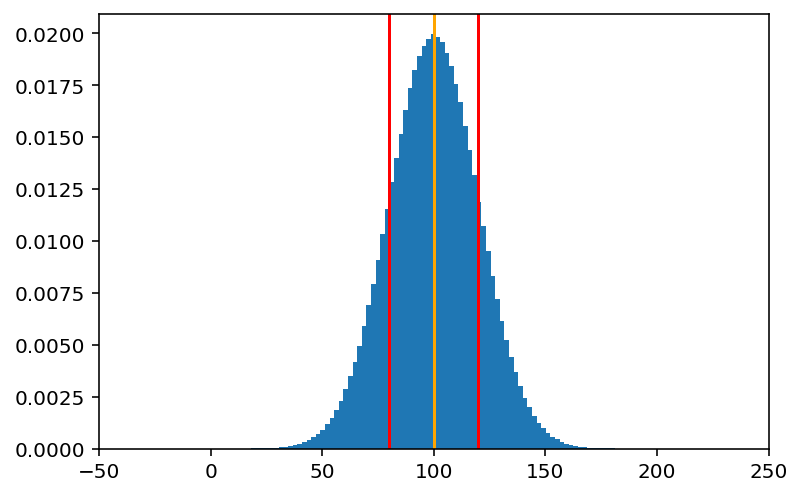

In [4]:
plt.figure()
plt.hist(pop, bins=100, density=True)
plt.axvline(x=pop_mean, color="orange")
plt.axvline(x=pop_mean - pop_sd, color="red")
plt.axvline(x=pop_mean + pop_sd, color="red")
plt.xlim(-50, 250)
plt.show()


## Drawing two random samples of 10 elements

In [5]:
sample_n = 30
x1 = rd.sample(pop, sample_n)
x2 = rd.sample(pop, sample_n)

### Mean and standard deviation from the samples:

In [6]:
x1_mean_hat = np.mean(x1)
x1_sd_hat = np.std(x1, ddof=1)

x1_mean_hat, x1_sd_hat

(100.73013992072467, 20.438534791217435)

In [7]:
x2_mean_hat = np.mean(x2)
x2_sd_hat = np.std(x2, ddof=1)

x2_mean_hat, x2_sd_hat

(96.95263525763781, 18.379819568334188)

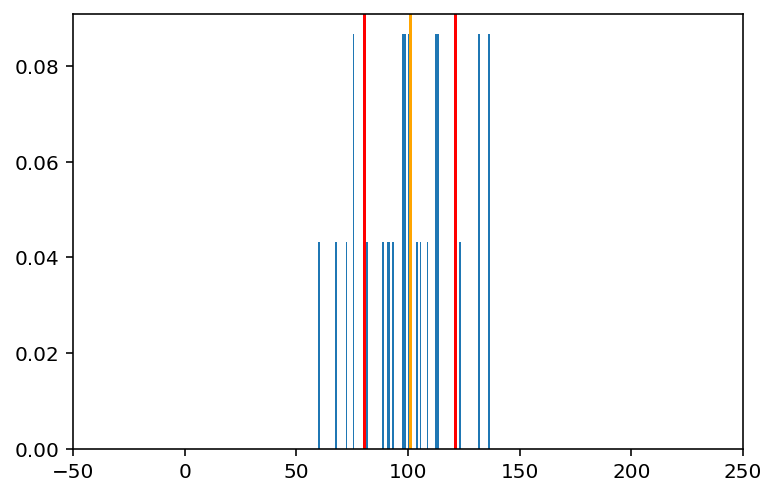

In [8]:
plt.figure()
plt.hist(x1, bins=100, density=True)
plt.xlim(-50, 250)
plt.axvline(x=x1_mean_hat, color="orange")
plt.axvline(x=x1_mean_hat - x1_sd_hat, color="red")
plt.axvline(x=x1_mean_hat + x1_sd_hat, color="red")
plt.show()

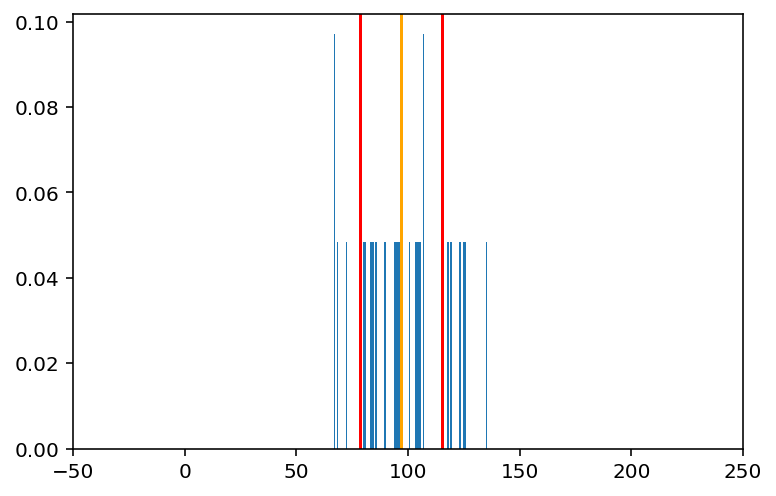

In [9]:
plt.figure()
plt.hist(x2, bins=100, density=True)
plt.xlim(-50, 250)
plt.axvline(x=x2_mean_hat, color="orange")
plt.axvline(x=x2_mean_hat - x2_sd_hat, color="red")
plt.axvline(x=x2_mean_hat + x2_sd_hat, color="red")
plt.show()

## Drawing 100 independent random samples from the population

In [10]:
n_samples = 1000
xn_means =[np.mean(rd.sample(pop, sample_n)) for i in range(n_samples)]

### Mean and standard deviation from the sample means

In [11]:
xn_means_mean_hat = np.mean(xn_means)
xn_means_sd_hat = np.std(xn_means)

xn_means_mean_hat, xn_means_sd_hat 

(100.16504051310586, 3.680469526731415)

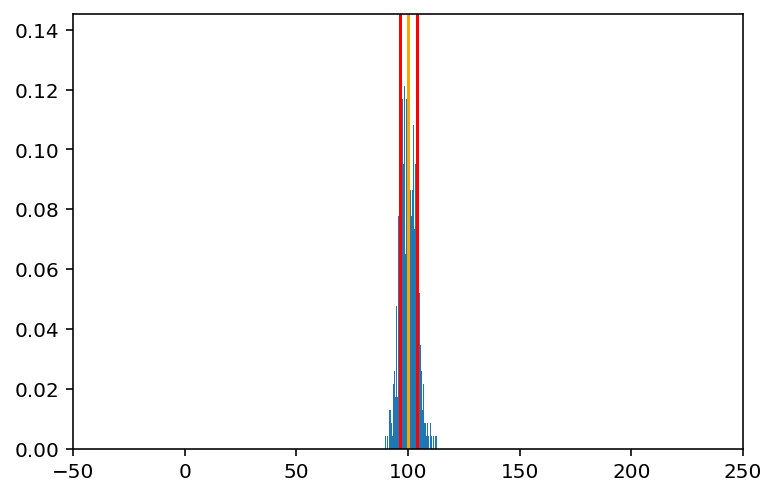

In [12]:
plt.figure()
plt.hist(xn_means, bins=100, density=True)
plt.xlim(-50, 250)
plt.axvline(x=xn_means_mean_hat, color="orange")
plt.axvline(x=xn_means_mean_hat - xn_means_sd_hat, color="red")
plt.axvline(x=xn_means_mean_hat + xn_means_sd_hat, color="red")
plt.show()

## The standard deviation of the means can be derived differently and is generally called standard error!

### True standard error

In [13]:
x_se = pop_sd / np.sqrt(sample_n)

x_se

3.652123501925444

### Estimated standard error purely from sample

In [14]:
x1_se_hat = x1_sd_hat / np.sqrt(sample_n-1) # one df
x2_se_hat = x2_sd_hat / np.sqrt(sample_n-1)

x1_se_hat, x2_se_hat

(3.795340629898562, 3.4130468103750125)

In [15]:
x_se, xn_means_sd_hat, x1_se_hat, x2_se_hat

(3.652123501925444, 3.680469526731415, 3.795340629898562, 3.4130468103750125)

## We can derive from the sample itself the standard error and thereby the precision of the sample mean!